In [51]:
import pandas as pd

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Check the distribution of the newly defined Success_Class
success_class_distribution = rookie_data_filtered['Success_Class'].value_counts(normalize=True) * 100
success_class_distribution_summary = success_class_distribution.to_frame(name='Percentage')

# Displaying the filtered dataset
print("Filtered Rookie Data:")
print(rookie_data_filtered.head())  # Displaying the first few rows of filtered data

# Displaying the success class distribution summary
print("\nSuccess Class Distribution Summary:")
print(success_class_distribution_summary)


Filtered Rookie Data:
   Unnamed: 0             Player         Debut  Age   G    MP    FG%    3P%  \
0          89  victor wembanyama  202310250SAS   20  52  1481  0.467  0.318   
1          94     paolo banchero  202210190DET   20  72  2430  0.427  0.298   
2         182     scottie barnes  202110200TOR   20  74  2617  0.492  0.301   
3         229      herbert jones  202110200NOP   23  78  2335  0.476  0.337   
4         248        evan mobley  202110200MEM   20  69  2331  0.508  0.250   

     FT%  PER GAME MP  ...  PER GAME BLK  PER GAME TOV     Season  \
0  0.813         28.5  ...           3.3           3.4  2023-2024   
1  0.738         33.8  ...           0.5           2.8  2022-2023   
2  0.735         35.4  ...           0.7           1.8  2021-2022   
3  0.840         29.9  ...           0.8           1.3  2021-2022   
4  0.663         33.8  ...           1.7           1.9  2021-2022   

   All-League Team  Rookie of the Year  Defensive Award Winner MVP Winner  \
0          

Accuracy: 0.6627

Classification Report:
              precision    recall  f1-score   support

High Success       0.48      0.44      0.46        27
 Low Success       0.74      0.77      0.75        56

    accuracy                           0.66        83
   macro avg       0.61      0.61      0.61        83
weighted avg       0.66      0.66      0.66        83


Confusion Matrix:
[[12 15]
 [13 43]]


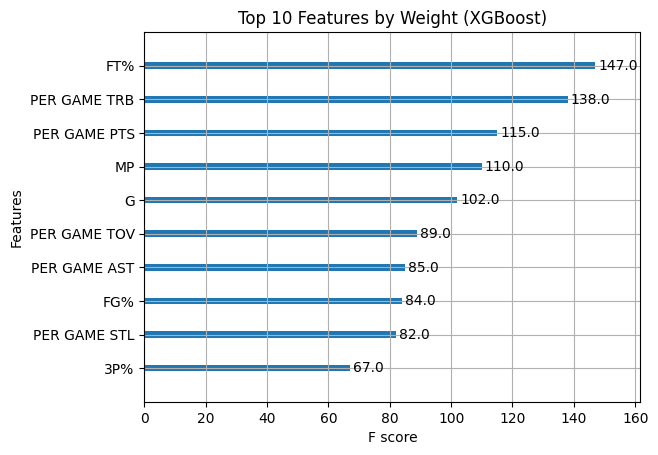

In [60]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Select your features and target variable
features = ["Age", "G", "MP", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS", 
            "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]

X = rookie_data_filtered[features]
y = rookie_data_filtered["Success_Class"]  # Keep original labels ('Low Success' and 'High Success')

# Encode 'Low Success' as 0 and 'High Success' as 1
y_encoded = y.map({"Low Success": 0, "High Success": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # For binary classification (Low Success vs High Success)
    eval_metric="logloss",        # Logarithmic loss for evaluation
    max_depth=6,                  # Maximum depth of the tree
    learning_rate=0.1,            # Learning rate (step size)
    n_estimators=100,             # Number of trees to grow
    random_state=42               # For reproducibility
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Convert predictions (0 and 1) back to original labels ('Low Success' and 'High Success')
y_pred_labels = pd.Series(y_pred).map({0: 'Low Success', 1: 'High Success'})

# Map y_test to the original labels ('Low Success' and 'High Success')
y_test_labels = y_test.map({0: 'Low Success', 1: 'High Success'})

# Evaluate the model performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Plot feature importance using XGBoost's built-in function
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.title("Top 10 Features by Weight (XGBoost)")
plt.show()


SMOTEEEN

Accuracy: 0.6867

Classification Report:
              precision    recall  f1-score   support

High Success       0.52      0.59      0.55        27
 Low Success       0.79      0.73      0.76        56

    accuracy                           0.69        83
   macro avg       0.65      0.66      0.66        83
weighted avg       0.70      0.69      0.69        83


Confusion Matrix:
[[16 11]
 [15 41]]


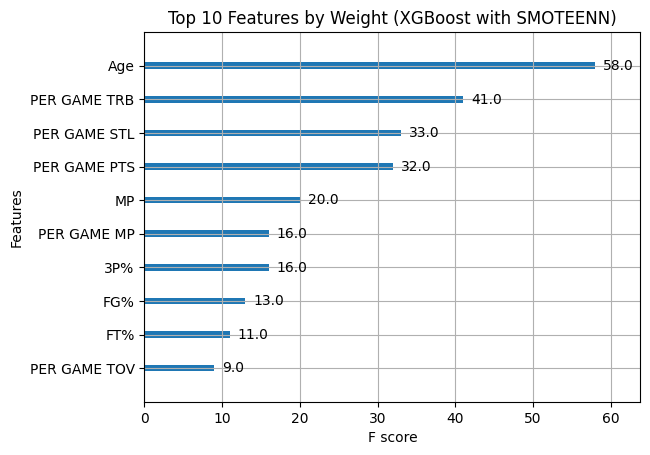

In [61]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN  # Import SMOTEENN

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Select your features and target variable
features = ["Age", "G", "MP", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS", 
            "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]

X = rookie_data_filtered[features]
y = rookie_data_filtered["Success_Class"]  # Keep original labels ('Low Success' and 'High Success')

# Encode 'Low Success' as 0 and 'High Success' as 1
y_encoded = y.map({"Low Success": 0, "High Success": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # For binary classification (Low Success vs High Success)
    eval_metric="logloss",        # Logarithmic loss for evaluation
    max_depth=6,                  # Maximum depth of the tree
    learning_rate=0.1,            # Learning rate (step size)
    n_estimators=100,             # Number of trees to grow
    random_state=42               # For reproducibility
)

# Train the XGBoost model with resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Convert predictions (0 and 1) back to original labels ('Low Success' and 'High Success')
y_pred_labels = pd.Series(y_pred).map({0: 'Low Success', 1: 'High Success'})

# Map y_test to the original labels ('Low Success' and 'High Success')
y_test_labels = y_test.map({0: 'Low Success', 1: 'High Success'})

# Evaluate the model performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Plot feature importance using XGBoost's built-in function
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.title("Top 10 Features by Weight (XGBoost with SMOTEENN)")
plt.show()


Finding best parameters

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6988

Classification Report:
              precision    recall  f1-score   support

High Success       0.53      0.59      0.56        27
 Low Success       0.79      0.75      0.77        56

    accuracy                           0.70        83
   macro avg       0.66      0.67      0.67        83
weighted avg       0.71      0.70      0.70        83


Confusion Matrix:
[[16 11]
 [14 42]]


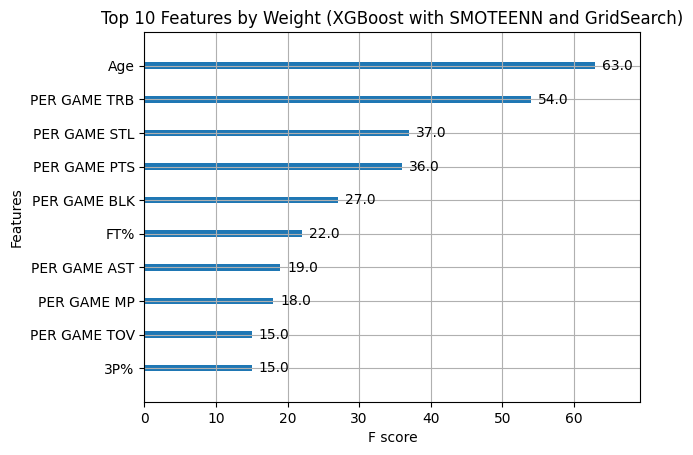

In [62]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN  # Import SMOTEENN

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Select your features and target variable
features = ["Age", "G", "MP", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS", 
            "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]

X = rookie_data_filtered[features]
y = rookie_data_filtered["Success_Class"]  # Keep original labels ('Low Success' and 'High Success')

# Encode 'Low Success' as 0 and 'High Success' as 1
y_encoded = y.map({"Low Success": 0, "High Success": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 6, 10],              # Max depth of the tree
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'n_estimators': [50, 100, 200],      # Number of trees
    'subsample': [0.8, 0.9, 1.0],         # Subsample ratio of the training data
    'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features to use per tree
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss",
    random_state=42
)

# Run Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Convert predictions (0 and 1) back to original labels ('Low Success' and 'High Success')
y_pred_labels = pd.Series(y_pred).map({0: 'Low Success', 1: 'High Success'})

# Map y_test to the original labels ('Low Success' and 'High Success')
y_test_labels = y_test.map({0: 'Low Success', 1: 'High Success'})

# Evaluate the model performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Plot feature importance using XGBoost's built-in function
xgb.plot_importance(best_model, importance_type="weight", max_num_features=10)
plt.title("Top 10 Features by Weight (XGBoost with SMOTEENN and GridSearch)")
plt.show()


C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Threshold: 0.37
Best F1-Score: 0.6377


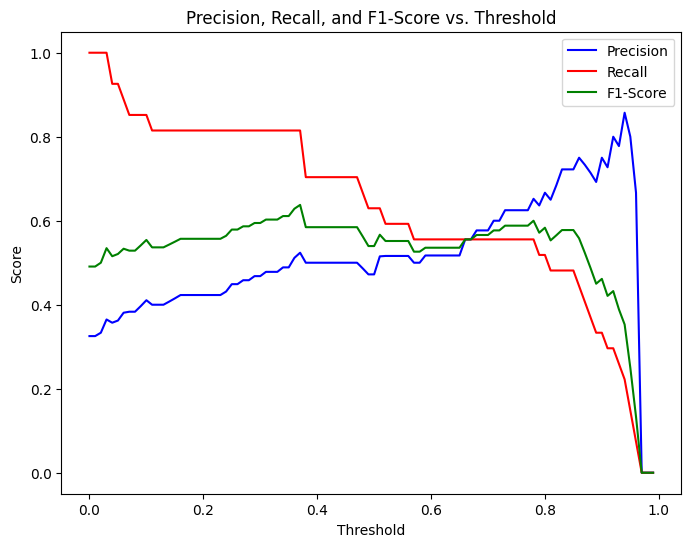

In [65]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the test set (the second column corresponds to the probability of class 1)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.0, 1.0, 0.01)

# Lists to store performance metrics for each threshold
f1_scores = []
precisions = []
recalls = []

# Loop through different thresholds
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Convert to original labels
    y_pred_labels = pd.Series(y_pred_threshold).map({0: 'Low Success', 1: 'High Success'})
    
    # Evaluate the performance
    f1 = f1_score(y_test_labels, y_pred_labels, pos_label='High Success')  # F1 score for class 1 (High Success)
    precision = precision_score(y_test_labels, y_pred_labels, pos_label='High Success')
    recall = recall_score(y_test_labels, y_pred_labels, pos_label='High Success')
    
    # Append results
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# Find the best threshold for F1-score
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
best_f1 = f1_scores[best_f1_index]

# Display the best threshold and corresponding F1 score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-Score: {best_f1:.4f}")

# Plot the precision-recall curve to visualize the tradeoff
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.plot(thresholds, f1_scores, label='F1-Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.show()


Best Threshold: 0.37
Best F1-Score: 0.6377

In [66]:
# Classify using the best threshold
y_pred_final = (y_pred_prob >= best_threshold).astype(int)

# Convert to original labels
y_pred_labels_final = pd.Series(y_pred_final).map({0: 'Low Success', 1: 'High Success'})

# Evaluate the performance with the best threshold
accuracy_final = accuracy_score(y_test_labels, y_pred_labels_final)
print(f"Final Accuracy: {accuracy_final:.4f}")

print("\nFinal Classification Report:")
print(classification_report(y_test_labels, y_pred_labels_final))

print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels_final))


Final Accuracy: 0.6988

Final Classification Report:
              precision    recall  f1-score   support

High Success       0.52      0.81      0.64        27
 Low Success       0.88      0.64      0.74        56

    accuracy                           0.70        83
   macro avg       0.70      0.73      0.69        83
weighted avg       0.76      0.70      0.71        83


Final Confusion Matrix:
[[22  5]
 [20 36]]


Average Statistics for Predicted Classes:
                       Age          G           MP       FG%       3P%  \
Predicted_Class                                                          
High Success     21.000000  76.694444  2501.027778  0.476222  0.227111   
Low Success      22.170213  59.595745  1259.829787  0.451638  0.146979   

                      FT%  PER GAME MP  PER GAME PTS  PER GAME TRB  \
Predicted_Class                                                      
High Success     0.749861    32.508333     15.836111      6.647222   
Low Success      0.599574    18.400000      7.080851      3.504255   

                 PER GAME AST  PER GAME STL  PER GAME BLK  PER GAME TOV  
Predicted_Class                                                          
High Success         3.733333      1.141667      0.916667      2.280556  
Low Success          1.521277      0.712766      0.685106      1.102128  


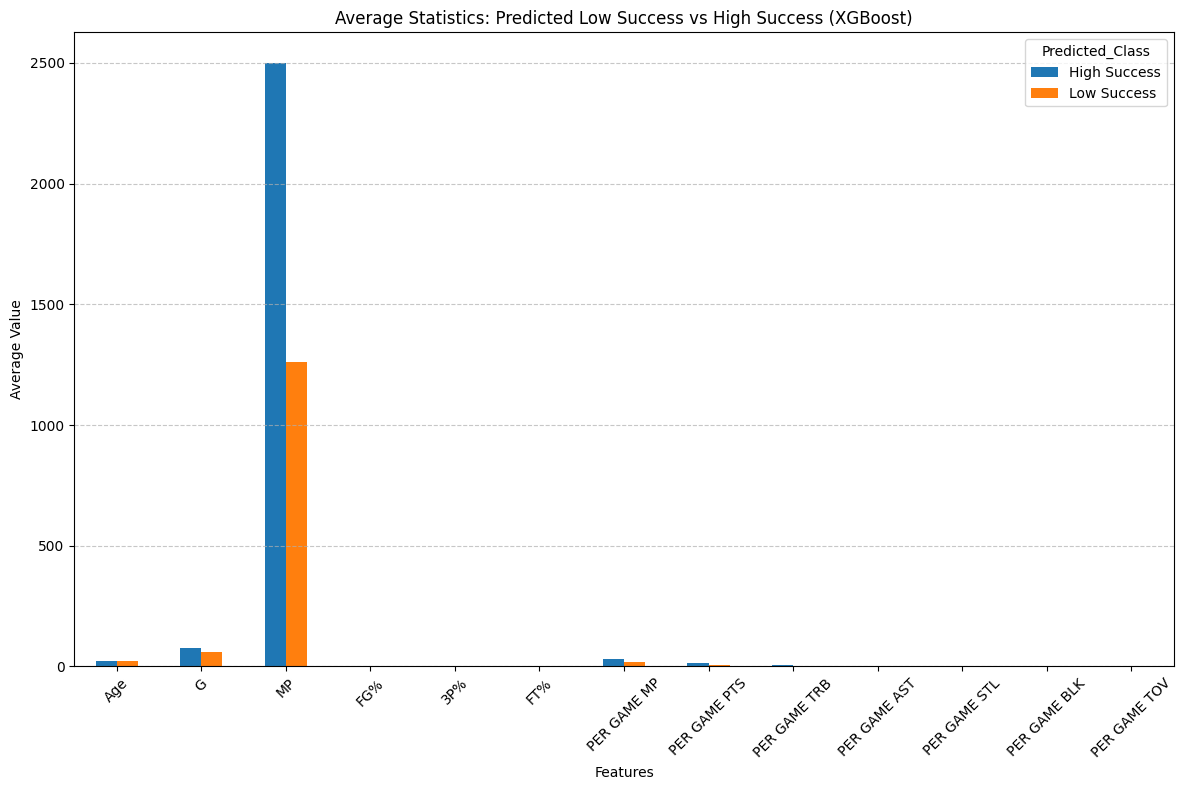

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Get predictions from the XGBoost model
y_pred = best_model.predict(X_test)

# Map predictions to readable labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_pred_mapped = pd.Series(y_pred, index=X_test.index).map(label_mapping)

# Add predictions to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Class'] = y_pred_mapped

# Calculate average stats for predicted classes
average_stats_xgb = X_test_with_predictions.groupby("Predicted_Class").mean()

# Display the results
print("Average Statistics for Predicted Classes:")
print(average_stats_xgb)

# Optional: Visualization
# Transpose the DataFrame for easier plotting
average_stats_xgb_transposed = average_stats_xgb.T

# Plot the average stats
average_stats_xgb_transposed.plot(kind='bar', figsize=(12, 8), title="Average Statistics: Predicted Low Success vs High Success (XGBoost)")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Statistics for Predicted Classes:
                       Age          G           MP       FG%       3P%  \
Predicted_Class                                                          
High Success     21.000000  76.694444  2501.027778  0.476222  0.227111   
Low Success      22.170213  59.595745  1259.829787  0.451638  0.146979   

                      FT%  PER GAME MP  PER GAME PTS  PER GAME TRB  \
Predicted_Class                                                      
High Success     0.749861    32.508333     15.836111      6.647222   
Low Success      0.599574    18.400000      7.080851      3.504255   

                 PER GAME AST  PER GAME STL  PER GAME BLK  PER GAME TOV  
Predicted_Class                                                          
High Success         3.733333      1.141667      0.916667      2.280556  
Low Success          1.521277      0.712766      0.685106      1.102128  


<Figure size 1200x800 with 0 Axes>

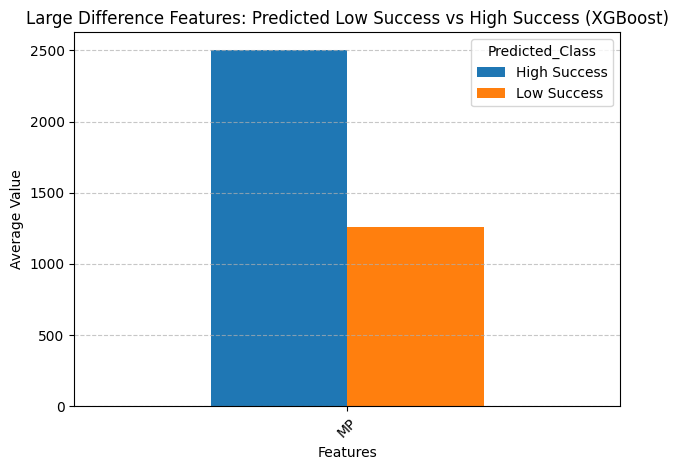

<Figure size 1200x800 with 0 Axes>

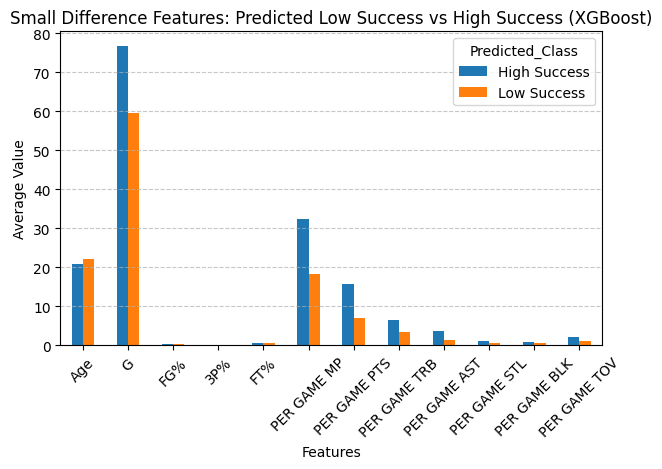

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Get predictions from the XGBoost model
y_pred = best_model.predict(X_test)

# Map predictions to readable labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_pred_mapped = pd.Series(y_pred, index=X_test.index).map(label_mapping)

# Add predictions to the test dataset
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Class'] = y_pred_mapped

# Calculate average stats for predicted classes
average_stats_xgb = X_test_with_predictions.groupby("Predicted_Class").mean()

# Display the results
print("Average Statistics for Predicted Classes:")
print(average_stats_xgb)

# Optional: Separate features with significant differences
threshold = 100  # Threshold for separating large and small differences

# Identify features with large differences
diffs = average_stats_xgb.max() - average_stats_xgb.min()
large_diff_features = diffs[diffs > threshold].index  # Use .index to access the feature names
small_diff_features = diffs[diffs <= threshold].index  # Use .index to access the feature names

# Transpose the DataFrame for easier plotting
average_stats_xgb_transposed = average_stats_xgb.T

# Plot the large difference features
plt.figure(figsize=(12, 8))
average_stats_xgb_transposed.loc[large_diff_features].plot(kind='bar', title="Large Difference Features: Predicted Low Success vs High Success (XGBoost)")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the small difference features
plt.figure(figsize=(12, 8))
average_stats_xgb_transposed.loc[small_diff_features].plot(kind='bar', title="Small Difference Features: Predicted Low Success vs High Success (XGBoost)")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


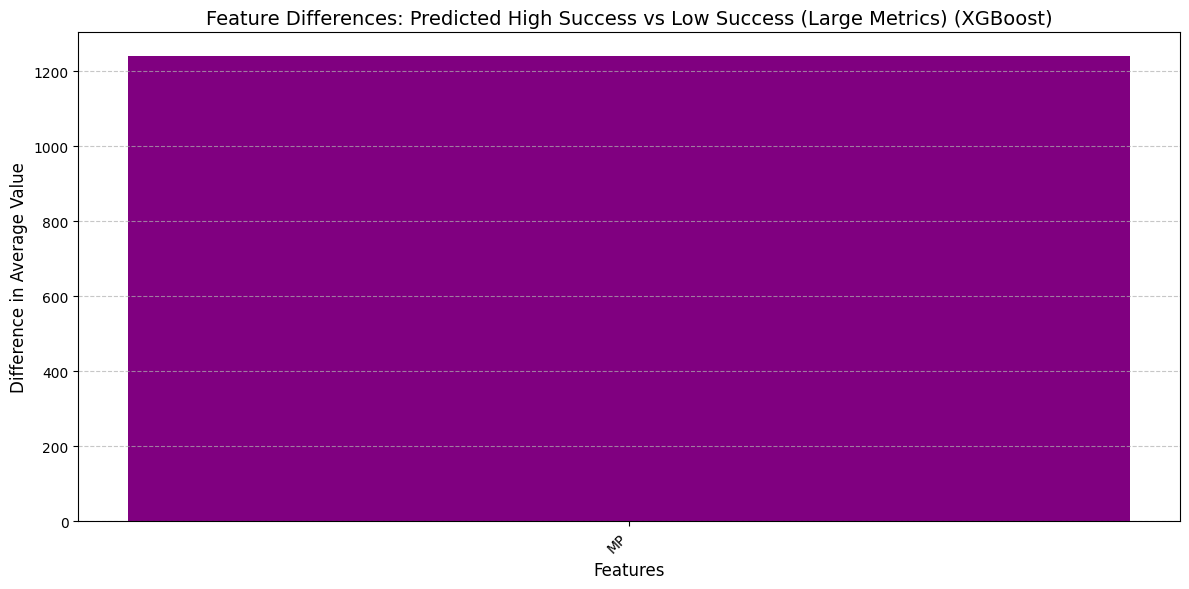

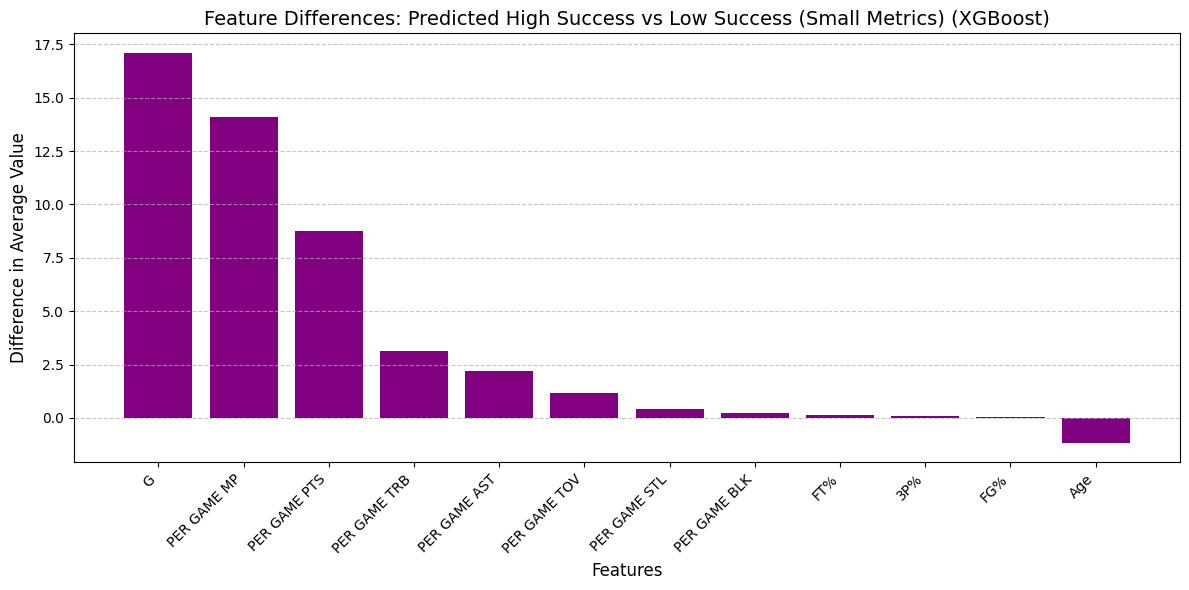

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate differences between classes for XGBoost
diff_stats = average_stats_xgb_transposed.loc[:, "High Success"] - average_stats_xgb_transposed.loc[:, "Low Success"]
diff_stats = diff_stats.sort_values(ascending=False)

# Define a threshold to separate large vs small metrics
threshold = 200  # Adjust this value depending on the scale of your metrics

# Split into large and small metrics
large_metrics = diff_stats[diff_stats > threshold]
small_metrics = diff_stats[diff_stats <= threshold]

# Plot the large metrics
plt.figure(figsize=(12, 6))
plt.bar(large_metrics.index, large_metrics, color="purple")
plt.title("Feature Differences: Predicted High Success vs Low Success (Large Metrics) (XGBoost)", fontsize=14)
plt.ylabel("Difference in Average Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the small metrics
plt.figure(figsize=(12, 6))
plt.bar(small_metrics.index, small_metrics, color="purple")
plt.title("Feature Differences: Predicted High Success vs Low Success (Small Metrics) (XGBoost)", fontsize=14)
plt.ylabel("Difference in Average Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


SHAP ANALYSIS

PermutationExplainer explainer: 84it [00:30,  2.39it/s]                        


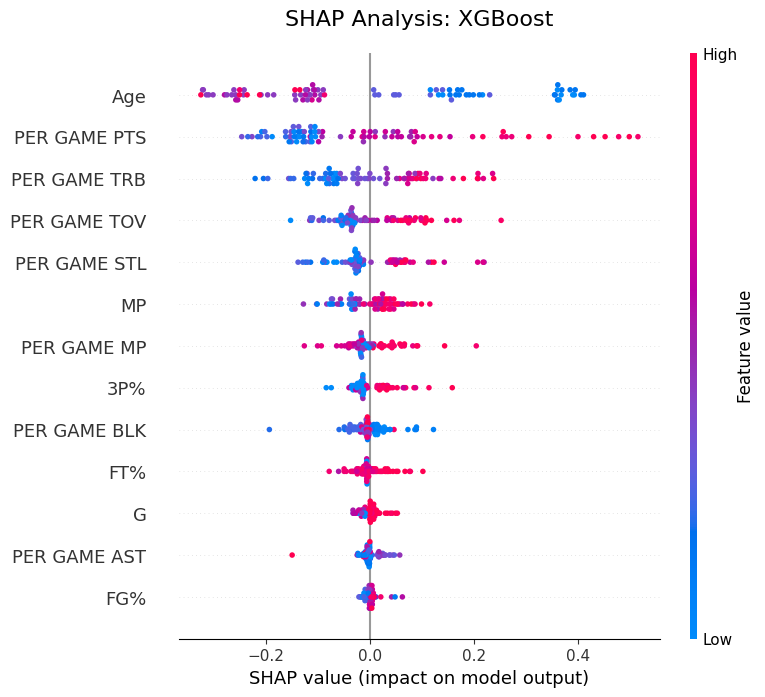

In [92]:
import shap
import matplotlib.pyplot as plt

# Initialize Permutation Explainer for XGBoost
explainer = shap.PermutationExplainer(best_model.predict, X_test)

# Compute SHAP values for XGBoost model
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)

# Add a title after the SHAP plot is rendered
plt.title("SHAP Analysis: XGBoost", fontsize=16, pad=20)

# Display the plot with the title
plt.show()


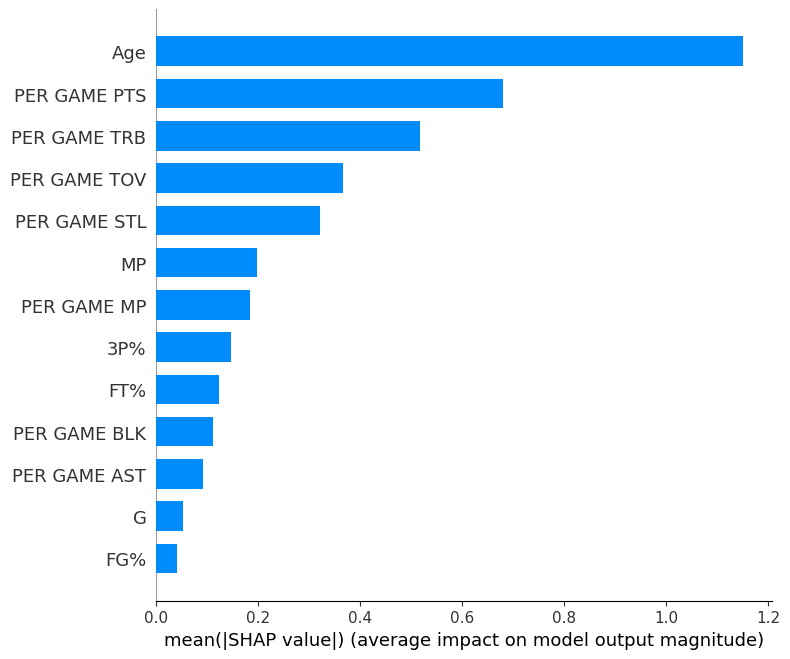

In [104]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Assuming best_model is the trained XGBoost model and X_test is the test set
# Ensure X_test contains only features that were used during model training

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")
# plt.title("Global Feature Importance (XGBoost)")
# plt.show()



In [96]:
# Extract feature importance from XGBoost model
importances = best_model.feature_importances_

# Sort the features based on their importance values (from highest to lowest)
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Display sorted feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.3f}")


PER GAME PTS: 0.184
Age: 0.127
PER GAME TOV: 0.114
PER GAME MP: 0.110
PER GAME TRB: 0.085
MP: 0.069
FG%: 0.055
G: 0.051
PER GAME STL: 0.049
FT%: 0.045
PER GAME BLK: 0.039
PER GAME AST: 0.037
3P%: 0.033


Just further testing not needed for the thesis

In [28]:
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid focusing on scale_pos_weight
params = {
    "scale_pos_weight": [5, 10, 20],  # Testing higher class imbalance ratios
    "max_depth": [3, 5],
    "learning_rate": [0.1],
    "n_estimators": [100],
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Grid Search with focus on High Success F1-Score
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    scoring=make_scorer(f1_score, pos_label=1),  # Optimize for High Success F1
    cv=5,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best model and parameters
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on the test set
y_pred = best_xgb.predict(X_test)
f1_high_success = f1_score(y_test, y_pred, pos_label=1)
report = classification_report(y_test, y_pred, target_names=["Low Success", "High Success"])

# Display results
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(report)
print("\nF1-Score for High Success:", f1_high_success)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_en

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 20}

Classification Report:
              precision    recall  f1-score   support

 Low Success       0.78      0.39      0.52        54
High Success       0.41      0.79      0.54        29

    accuracy                           0.53        83
   macro avg       0.59      0.59      0.53        83
weighted avg       0.65      0.53      0.53        83


F1-Score for High Success: 0.5411764705882353

Confusion Matrix:
[[21 33]
 [ 6 23]]


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_en

Recall improved but still poor overall


In [36]:
y_proba = best_xgb.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_adjusted = (y_proba >= threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.79      0.35      0.49        54
           1       0.41      0.83      0.55        29

    accuracy                           0.52        83
   macro avg       0.60      0.59      0.52        83
weighted avg       0.66      0.52      0.51        83



In [37]:
import numpy as np
from sklearn.metrics import f1_score

# Get predicted probabilities for the positive class
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Define thresholds to test
thresholds = np.arange(0, 1.01, 0.01)

# Store the F1-scores for each threshold
f1_scores = []

for threshold in thresholds:
    # Adjust predictions based on the current threshold
    y_pred_adjusted = (y_proba >= threshold).astype(int)
    # Calculate F1-score for High Success
    f1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_scores.append(f1)

# Find the threshold that gives the maximum F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"Best Threshold: {best_threshold}")
print(f"Best F1-Score: {best_f1_score}")

# Use the best threshold to adjust predictions
y_pred_best_threshold = (y_proba >= best_threshold).astype(int)

# Final Classification Report
print("Classification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best_threshold, target_names=["Low Success", "High Success"]))



Best Threshold: 0.61
Best F1-Score: 0.5641025641025641
Classification Report with Best Threshold:
              precision    recall  f1-score   support

 Low Success       0.79      0.50      0.61        54
High Success       0.45      0.76      0.56        29

    accuracy                           0.59        83
   macro avg       0.62      0.63      0.59        83
weighted avg       0.67      0.59      0.60        83



still poor, trying SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from xgboost import XGBClassifier
import numpy as np

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the XGBoost model with resampled data
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_smote.fit(X_resampled, y_resampled)

# Predict probabilities for the test set
y_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Determine optimal threshold using the validation process
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_proba_smote >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

# Final predictions with the best threshold
y_pred_best_smote = (y_proba_smote >= best_threshold).astype(int)

# Evaluate the model
print(f"Best Threshold after SMOTE: {best_threshold}")
print(f"Best F1-Score after SMOTE: {best_f1_score}")
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_best_smote, target_names=["Low Success", "High Success"]))


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Threshold after SMOTE: 0.46
Best F1-Score after SMOTE: 0.5714285714285714

Classification Report with SMOTE:
              precision    recall  f1-score   support

 Low Success       0.80      0.52      0.63        54
High Success       0.46      0.76      0.57        29

    accuracy                           0.60        83
   macro avg       0.63      0.64      0.60        83
weighted avg       0.68      0.60      0.61        83



In [39]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the XGBoost model with SMOTE and adjusted class weights
xgb_smote_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)
xgb_smote_weighted.fit(X_resampled, y_resampled)

# Predict probabilities for the test set
y_proba_smote_weighted = xgb_smote_weighted.predict_proba(X_test)[:, 1]

# Determine the optimal threshold using F1-score
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_proba_smote_weighted >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

# Final predictions with the best threshold
y_pred_best_smote_weighted = (y_proba_smote_weighted >= best_threshold).astype(int)

# Evaluate the model
print(f"Best Threshold with SMOTE and Class Weights: {best_threshold}")
print(f"Best F1-Score with SMOTE and Class Weights: {best_f1_score}")
print("\nClassification Report with SMOTE and Class Weights:")
print(classification_report(y_test, y_pred_best_smote_weighted, target_names=["Low Success", "High Success"]))


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Threshold with SMOTE and Class Weights: 0.72
Best F1-Score with SMOTE and Class Weights: 0.5588235294117647

Classification Report with SMOTE and Class Weights:
              precision    recall  f1-score   support

 Low Success       0.77      0.63      0.69        54
High Success       0.49      0.66      0.56        29

    accuracy                           0.64        83
   macro avg       0.63      0.64      0.63        83
weighted avg       0.67      0.64      0.65        83



SMote and Class Weights kind of help, lets see if only weight class can do a better job


In [40]:
# Re-import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Reload the dataset
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"
rookie_data_df = pd.read_csv(data_path)

# Map Success_Class based on the success column
rookie_data_df["Success_Class"] = rookie_data_df["success"].apply(
    lambda x: "High Success" if x >= 2 else "Low Success"
)
rookie_data_df["Success_Class"] = rookie_data_df["Success_Class"].map({"Low Success": 0, "High Success": 1})

# Features and target variable
features = [
    "Age", "G", "MP", "FG%", "3P%", "FT%", 
    "PER GAME MP", "PER GAME PTS", "PER GAME TRB", 
    "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"
]
target = "Success_Class"

X = rookie_data_df[features]
y = rookie_data_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the XGBoost model with adjusted class weights
xgb_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)
xgb_weighted.fit(X_train, y_train)

# Predict probabilities for the test set
y_proba_weighted = xgb_weighted.predict_proba(X_test)[:, 1]

# Determine the optimal threshold using F1-score
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_proba_weighted >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

# Final predictions with the best threshold
y_pred_best_weighted = (y_proba_weighted >= best_threshold).astype(int)

# Evaluate the model
print(f"Best Threshold with Class Weights: {best_threshold}")
print(f"Best F1-Score with Class Weights: {best_f1_score}")
print("\nClassification Report with Class Weights:")
print(classification_report(y_test, y_pred_best_weighted, target_names=["Low Success", "High Success"]))


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Threshold with Class Weights: 0.35000000000000003
Best F1-Score with Class Weights: 0.5633802816901409

Classification Report with Class Weights:
              precision    recall  f1-score   support

 Low Success       0.78      0.59      0.67        54
High Success       0.48      0.69      0.56        29

    accuracy                           0.63        83
   macro avg       0.63      0.64      0.62        83
weighted avg       0.67      0.63      0.64        83



In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [5, 10, 20],
}

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, pos_label=1),
    cv=5,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best model and parameters
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on the test set
y_proba = best_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.35).astype(int)

# Final Evaluation
print("Best Parameters:", best_params)
print("Classification Report with Tuned Parameters:")
print(classification_report(y_test, y_pred, target_names=["Low Success", "High Success"]))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_en

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'scale_pos_weight': 10, 'subsample': 1.0}
Classification Report with Tuned Parameters:
              precision    recall  f1-score   support

 Low Success       0.76      0.30      0.43        54
High Success       0.39      0.83      0.53        29

    accuracy                           0.48        83
   macro avg       0.57      0.56      0.48        83
weighted avg       0.63      0.48      0.46        83



Still poor

False Positives (Predicted High Success, Actual Low Success):
             Age          G           MP        FG%        3P%        FT%  \
count  38.000000  38.000000    38.000000  38.000000  38.000000  38.000000   
mean   21.473684  64.184211  1507.631579   0.450658   0.161184   0.666211   
std     1.826780  23.188831   827.317855   0.128034   0.176008   0.199507   
min    18.000000   1.000000     1.000000   0.000000   0.000000   0.000000   
25%    20.250000  60.750000  1074.250000   0.434750   0.000000   0.663250   
50%    21.000000  71.500000  1391.500000   0.473000   0.126500   0.720000   
75%    22.000000  80.750000  2083.500000   0.503000   0.330750   0.767750   
max    26.000000  82.000000  3092.000000   0.706000   0.500000   0.896000   

       PER GAME MP  PER GAME PTS  PER GAME TRB  PER GAME AST  PER GAME STL  \
count    38.000000     38.000000     38.000000     38.000000     38.000000   
mean     21.142105      9.481579      4.468421      1.892105      0.952632   
std       

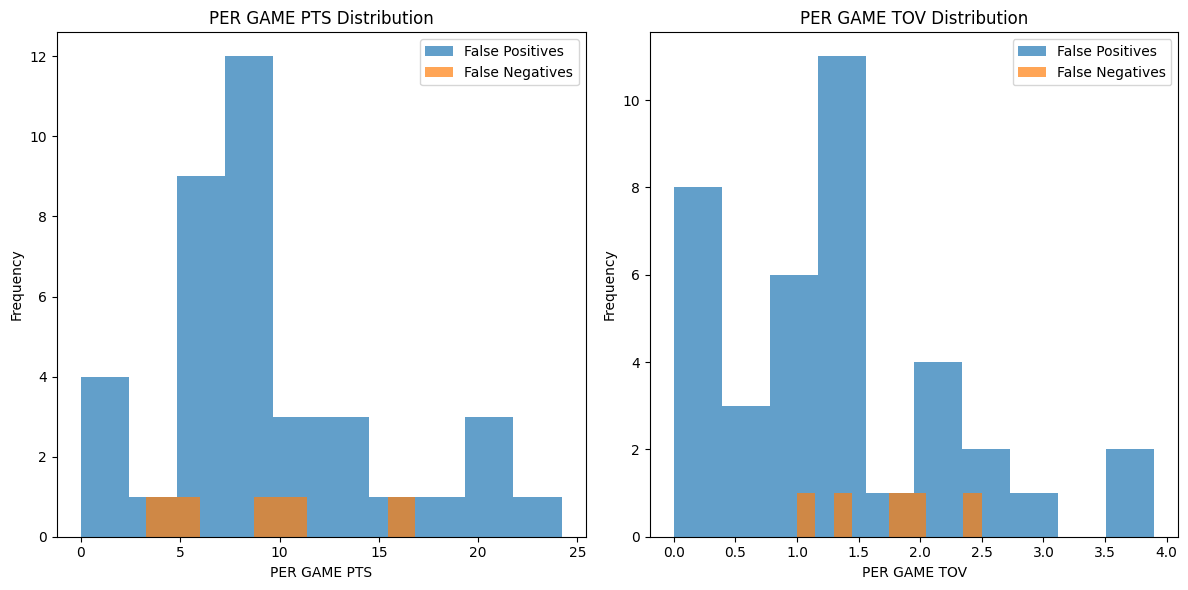

In [42]:
# Create a DataFrame for analysis
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred

# Identify misclassified cases
false_positives = test_results[(test_results['Actual'] == 0) & (test_results['Predicted'] == 1)]
false_negatives = test_results[(test_results['Actual'] == 1) & (test_results['Predicted'] == 0)]

# Summary of misclassified cases
print("False Positives (Predicted High Success, Actual Low Success):")
print(false_positives.describe())

print("\nFalse Negatives (Predicted Low Success, Actual High Success):")
print(false_negatives.describe())

# Visualize key feature differences (e.g., PER GAME PTS and PER GAME TOV)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Visualize PER GAME PTS
plt.subplot(1, 2, 1)
plt.hist(false_positives['PER GAME PTS'], alpha=0.7, label='False Positives', bins=10)
plt.hist(false_negatives['PER GAME PTS'], alpha=0.7, label='False Negatives', bins=10)
plt.xlabel('PER GAME PTS')
plt.ylabel('Frequency')
plt.title('PER GAME PTS Distribution')
plt.legend()

# Visualize PER GAME TOV
plt.subplot(1, 2, 2)
plt.hist(false_positives['PER GAME TOV'], alpha=0.7, label='False Positives', bins=10)
plt.hist(false_negatives['PER GAME TOV'], alpha=0.7, label='False Negatives', bins=10)
plt.xlabel('PER GAME TOV')
plt.ylabel('Frequency')
plt.title('PER GAME TOV Distribution')
plt.legend()

plt.tight_layout()
plt.show()


Trying to engineer features
Just for fun since the other models doesnt have them

In [46]:
rookie_data_df['PTS_PER_MIN'] = rookie_data_df['PER GAME PTS'] / rookie_data_df['PER GAME MP']
rookie_data_df['TOV_PER_AST'] = rookie_data_df['PER GAME TOV'] / (rookie_data_df['PER GAME AST'] + 1e-5)


In [44]:
# Feature Engineering: Adding Points per Minute and Turnovers per Assist
X_train['PTS_PER_MIN'] = X_train['PER GAME PTS'] / (X_train['PER GAME MP'] + 1e-5)
X_train['TOV_PER_AST'] = X_train['PER GAME TOV'] / (X_train['PER GAME AST'] + 1e-5)

X_test['PTS_PER_MIN'] = X_test['PER GAME PTS'] / (X_test['PER GAME MP'] + 1e-5)
X_test['TOV_PER_AST'] = X_test['PER GAME TOV'] / (X_test['PER GAME AST'] + 1e-5)

# Train a new XGBoost model with the engineered features
xgb_engineered = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=10,  # Retaining the best weight from previous runs
    random_state=42
)
xgb_engineered.fit(X_train, y_train)

# Predict probabilities for the test set
y_proba_engineered = xgb_engineered.predict_proba(X_test)[:, 1]

# Determine the optimal threshold using F1-score
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_proba_engineered >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_scores.append(f1)

best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

# Final predictions with the best threshold
y_pred_best_engineered = (y_proba_engineered >= best_threshold).astype(int)

# Evaluate the model
print(f"Best Threshold with Engineered Features: {best_threshold}")
print(f"Best F1-Score with Engineered Features: {best_f1_score}")
print("\nClassification Report with Engineered Features:")
print(classification_report(y_test, y_pred_best_engineered, target_names=["Low Success", "High Success"]))



c:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Threshold with Engineered Features: 0.49
Best F1-Score with Engineered Features: 0.5915492957746479

Classification Report with Engineered Features:
              precision    recall  f1-score   support

 Low Success       0.80      0.61      0.69        54
High Success       0.50      0.72      0.59        29

    accuracy                           0.65        83
   macro avg       0.65      0.67      0.64        83
weighted avg       0.70      0.65      0.66        83

